# Marcos Barragán Corredera

https://www.linkedin.com/in/marcos-barragán-corredera-7415931b7

# Adrián González Retamosa

https://www.linkedin.com/in/adrián-gonzález-retamosa-b283a51b3

## Machine Learning

## CUNEF

### 04/12/2020

# Exploration and cleaning data analysis

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

In [2]:
path1 = '../data/Loan_training_set_1_4.csv'
path2 = '../data/Loan_training_set_2_4.csv'
path3 = '../data/Loan_training_set_3_4.csv'
path4 = '../data/Loan_training_set_4_4.csv'

In [3]:
df1 = pd.read_csv(path1, skiprows = 1, sep = ',')

df1.drop(df1.tail(2).index, inplace = True)

In [4]:
df2 = pd.read_csv(path2, skiprows = 1, sep = ',')

df2.drop(df2.tail(2).index, inplace = True)

In [5]:
df3 = pd.read_csv(path3, skiprows = 1, sep = ',')

df3.drop(df3.tail(2).index, inplace = True)

In [6]:
df4 = pd.read_csv(path4, skiprows = 1, sep = ',')

df4.drop(df4.tail(2).index, inplace = True)

We concatenate all of the data loadings:

In [7]:
df_g = pd.concat([df1, df2, df3, df4])

We want to check if there are duplicated values in our DataFrame, which contains all the data from the different 4 datasets loaded. To figure it out we will use _duplicated_ function of Python. 

In [8]:
duplicated = df_g[df_g.duplicated(keep = False)]

In [9]:
duplicated

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, fico_range_low, fico_range_high, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, last_fico_range_high, last_fico_range_low, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_act_il, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, num_bc_tl, num_il_tl, num_op_rev_tl, ...]
Index: []

[0 rows x 151 columns]

We check that there are no duplicated values in our DataFrame, which is great because we won't have to concern about commiting duplicated errors.

### Droping variables

Once we know the variables the dataset contains, we will apply _business knowledge_ to drop the variables present in our dataset. 

The variables which we delete in the first step are:

+ `acc_open_past_24mths`: we think that other variables are better to explain
+ `dti`
+ `loan_amnt`
+ `total_pymnt`
+ `total_pymnt_inv`
+ `total_rec_int`
+ `total_rec_late_fee`
+ `total_rec_prncp`
+ `total_rev_hi_lim`
+ `chargeoff_within_12_mths`
+ `collection_recovery_fee`
+ `collections_12_mths_ex_med`
+ `debt_settlement_flag`
+ `delinq_2yrs`
+ `earliest_cr_line`
+ `funded_amnt`
+ `funded_amnt_inv`
+ `id`
+ `inq_last_6mths`
+ `installment`
+ `issue_d`
+ `last_credit_pull_d`
+ `last_pymnt_amnt`
+ `last_pymnt_d`
+ `mo_sin_old_rev_tl_op`
+ `mo_sin_rcnt_tl`
+ `mths_since_recent_bc`
+ `mths_since_recent_inq`
+ `num_accts_ever_120_pd`
+ `num_actv_bc_tl`
+ `num_actv_rev_tl`
+ `num_bc_tl`
+ `num_il_tl`
+ `num_op_rev_tl`
+ `num_rev_accts`
+ `num_rev_tl_bal_gt_0`
+ `num_sats`
+ `num_tl_30dpd`
+ `num_tl_90g_dpd_24m`
+ `num_tl_op_past_12m`
+ `open_acc`
+ `out_prncp`
+ `out_prncp_inv`
+ `policy_code`
+ `pub_rec_bankruptcies`
+ `recoveries`
+ `revol_bal`
+ `revol_util`
+ `tax_liens`
+ `term`
+ `total_il_high_credit_limit`
+ `url`

In [10]:
df_g = df_g.drop(['acc_open_past_24mths', 
                  'dti',
                  'loan_amnt',
                  'total_pymnt',
                  'total_pymnt_inv',
                  'total_rec_int',
                  'total_rec_late_fee',
                  'total_rec_prncp',
                  'total_rev_hi_lim',
                  'chargeoff_within_12_mths',
                  'collection_recovery_fee',
                  'collections_12_mths_ex_med',
                  'debt_settlement_flag',
                  'delinq_2yrs',
                  'earliest_cr_line',
                  'funded_amnt',
                  'funded_amnt_inv',
                  'id',
                  'inq_last_6mths',
                  'installment',
                  'issue_d',
                  'last_credit_pull_d',
                  'last_pymnt_amnt',
                  'last_pymnt_d',
                  'mo_sin_old_rev_tl_op',
                  'mo_sin_rcnt_tl',
                  'mths_since_recent_bc',
                  'mths_since_recent_inq',
                  'num_accts_ever_120_pd',
                  'num_actv_bc_tl',
                  'num_actv_rev_tl',
                  'num_bc_tl',
                  'num_il_tl',
                  'num_op_rev_tl',
                  'num_rev_accts',
                  'num_rev_tl_bal_gt_0',
                  'num_sats',
                  'num_tl_30dpd',
                  'num_tl_90g_dpd_24m',
                  'num_tl_op_past_12m',
                  'open_acc',
                  'out_prncp',
                  'out_prncp_inv',
                  'policy_code',
                  'pub_rec_bankruptcies',
                  'recoveries',
                  'revol_bal',
                  'revol_util',
                  'tax_liens',
                  'term',
                  'total_il_high_credit_limit', 
                  'url'], 
                  axis='columns')

The next step is done because we started to analyze data by sampling it into 500 observations, and we saved it into `df`. Due to this, all the calls downside were done with this name. 

In order not to correct all the names below, we transform df_g into df.

In [11]:
df = df_g

We see that there are a lot of NaN values in the dataset. In our case, we would consider only those variables whose contribution of NaN values is $ < 70 \%$. Those which have more than $ 70 \% $ as wrong data values will be deleted.

In [12]:
# eliminamos las variables con mas del 70% de obs con NaN
filtro_Nan = len(df) * .7
df.dropna(thresh = filtro_Nan, axis = 'columns', inplace = True)
df.shape

(884876, 41)

In [14]:
df.columns

Index(['int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'fico_range_low', 'fico_range_high', 'pub_rec', 'total_acc',
       'initial_list_status', 'last_fico_range_high', 'last_fico_range_low',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_rcnt_rev_tl_op', 'mort_acc',
       'num_bc_sats', 'num_tl_120dpd_2m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'hardship_flag', 'disbursement_method'],
      dtype='object')

We see that, after dropping variables with more than a 70% of NaN values, we have a new dataset composed of 41 columns only.

If we check the type of the variables we are working with, we will see:

In [131]:
#vemos el tipo de nuestras variables y la cantidad de NaN
df_typ = pd.merge(df.isnull().sum(axis = 0).sort_values().to_frame('NaN_values').reset_index(),
                     df.dtypes.to_frame('types').reset_index(),
                     on = 'index',
                     how = 'inner')
df_typ

index  NaN_values    types
0                int_rate           0   object
1    last_fico_range_high           0  float64
2           hardship_flag           0   object
3        application_type           0   object
4          acc_now_delinq           0  float64
5            tot_coll_amt           0  float64
6             tot_cur_bal           0  float64
7     initial_list_status           0   object
8             delinq_amnt           0  float64
9                mort_acc           0  float64
10            num_bc_sats           0  float64
11         pct_tl_nvr_dlq           0  float64
12        tot_hi_cred_lim           0  float64
13      total_bal_ex_mort           0  float64
14         total_bc_limit           0  float64
15  mo_sin_rcnt_rev_tl_op           0  float64
16              total_acc           0  float64
17    last_fico_range_low           0  float64
18        fico_range_high           0  float64
19                  grade           0   object
20              sub_grade           0   object
21         home_ownership           0   object
22             annual_inc           0  float64
23    verification_status           0   object
24                pub_rec           0  float64
25            loan_status           0   object
26    disbursement_method           0   object
27             pymnt_plan           0   object
28                purpose           0   object
29               zip_code           0   object
30             addr_state           0   object
31         fico_range_low           0  float64
32            avg_cur_bal          13  float64
33                  title         132   object
34         bc_open_to_buy        9287  float64
35       percent_bc_gt_75        9680  float64
36                bc_util        9824  float64
37     mo_sin_old_il_acct       25614  float64
38       num_tl_120dpd_2m       37803  float64
39             emp_length       51193   object
40              emp_title       52693   object

Let see the principal statistics measures of the numeric values in our dataset once we have dropped the variables we are not going to consider:

In [132]:
round(df.describe(),3).T

count        mean         std    min      25%  \
annual_inc             884876.0   77102.415  135491.609    0.0  46000.0   
fico_range_low         884876.0     694.699      30.936  660.0    670.0   
fico_range_high        884876.0     698.699      30.937  664.0    674.0   
pub_rec                884876.0       0.226       0.623    0.0      0.0   
total_acc              884876.0      25.112      12.022    2.0     16.0   
last_fico_range_high   884876.0     686.138      70.031    0.0    659.0   
last_fico_range_low    884876.0     675.260     104.092    0.0    655.0   
acc_now_delinq         884876.0       0.006       0.083    0.0      0.0   
tot_coll_amt           884876.0     253.656    9942.521    0.0      0.0   
tot_cur_bal            884876.0  141334.587  156637.669    0.0  30180.0   
avg_cur_bal            884863.0   13354.806   15985.456    0.0   3148.0   
bc_open_to_buy         875589.0    9947.906   15123.770    0.0   1394.0   
bc_util                875052.0      61.236      27.760    0.0     40.2   
delinq_amnt            884876.0      13.943     790.341    0.0      0.0   
mo_sin_old_il_acct     859262.0     127.253      52.471    0.0    100.0   
mo_sin_rcnt_rev_tl_op  884876.0      13.541      17.013    0.0      4.0   
mort_acc               884876.0       1.654       1.983    0.0      0.0   
num_bc_sats            884876.0       4.752       2.979    0.0      3.0   
num_tl_120dpd_2m       847073.0       0.001       0.032    0.0      0.0   
pct_tl_nvr_dlq         884876.0      93.895       9.028    0.0     90.9   
percent_bc_gt_75       875196.0      46.447      36.001    0.0     14.3   
tot_hi_cred_lim        884876.0  174945.029  176913.616    0.0  50427.0   
total_bal_ex_mort      884876.0   51250.132   48948.203    0.0  21719.0   
total_bc_limit         884876.0   21863.623   21866.205    0.0   7700.0   

                            50%        75%          max  
annual_inc              65000.0   92000.00  110000000.0  
fico_range_low            685.0     710.00        845.0  
fico_range_high           689.0     714.00        850.0  
pub_rec                     0.0       0.00         86.0  
total_acc                  23.0      32.00        169.0  
last_fico_range_high      694.0     729.00        850.0  
last_fico_range_low       690.0     725.00        845.0  
acc_now_delinq              0.0       0.00         14.0  
tot_coll_amt                0.0       0.00    9152545.0  
tot_cur_bal             80608.5  210655.00    4447397.0  
avg_cur_bal              7375.0   18484.00     555925.0  
bc_open_to_buy           4514.0   12032.00     559912.0  
bc_util                    64.6      85.70        318.2  
delinq_amnt                 0.0       0.00     249925.0  
mo_sin_old_il_acct        130.0     154.00        999.0  
mo_sin_rcnt_rev_tl_op       8.0      16.00        372.0  
mort_acc                    1.0       3.00         94.0  
num_bc_sats                 4.0       6.00         63.0  
num_tl_120dpd_2m            0.0       0.00          7.0  
pct_tl_nvr_dlq             97.5     100.00        100.0  
percent_bc_gt_75           50.0      75.00        100.0  
tot_hi_cred_lim        112845.5  252778.25    9999999.0  
total_bal_ex_mort       38505.5   64469.00    3408095.0  
total_bc_limit          15200.0   28500.00    1090700.0

### Transformation of target variable

The target variable in this case is the status of the loan, if it is paid or not. 

This target is composed of 7 different values:

+ Fully Paid: the loan is already paid.
+ Charged off: the loan is expected not to be paid. 
+ In grace period: a set length of time after the due date during which payment may be made without penalty. 
+ Late (16-30 days): the loan is out of time 16 to 30 days.
+ Late (31-120 days): delay from 1 to 4 months in the loan payment. 
+ Current: currently on the loan payment plan. 
+ Default: failure to meet the legal conditions of the loan.

We will transform this variable into a categoric one which will take the values:

+ 0: if the loan is not paid, or if it has a delay in the payment. 
+ 1: if the loan has been paid on time. 
+ 2: if the loan is currently in term. 

In order to achieve a more efficient code, we previously define the transformation function of the target variable and then we apply it to the DataFrame we are considering. 

In [133]:
def target(x):
    if x == 'Fully Paid':
        return 1
    elif x == 'Charged Off':
        return 0
    elif x == 'In Grace Period':
        return 0
    elif x == 'Late (31-120 days)':
        return 0
    elif x == 'Late (16-30 days)':
        return 0
    elif x == 'Current':
        return 2
    elif x == 'Default':
        return 0

In [134]:
df['loan_status'] = df.loan_status.map(target)
df.loan_status.unique()

array([2, 1, 0], dtype=int64)

To predict the probability of payment failure of the loan, we will not consider currently on term loan status, because we can't know if they are going to pay or not in the future. For this reason, we will only keep up non-paid loans (0) and paid loans (1) for the next steps in the study and prediction. This will be implemented applying a filter fot those values.

In [135]:
df_impago = df[(df.loan_status == 1) | (df.loan_status == 0)]
df_impago.loan_status.unique()

array([1, 0], dtype=int64)

   observaciones  variable
1         345520         1
0         116671         0


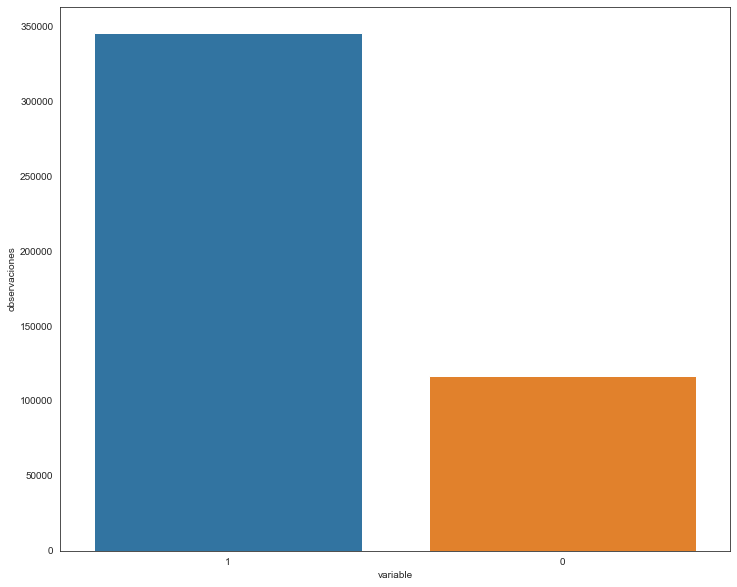

In [136]:
cuentas = pd.DataFrame({'observaciones' : df_impago['loan_status'].value_counts(),
                       'variable' : df_impago.loan_status.unique()}).sort_values(by = 'observaciones', ascending = False)
print(cuentas)

plt.figure(figsize = (12, 10))

sns.barplot(x = cuentas.variable, y = cuentas.observaciones, order = cuentas.variable);

If we calculate the paid and unpaid loans ratios, we get that the $75 \% $ of the data correspond to paid loans, and the other $25 \% $ are related to unpaid loans. 

We don't consider that 75 - 25 sampling rates are worrying, so, due to this, we are not going to implement a rebalance on our data. If we had $ 90 \% - 10 \% $ samples or even worse, then it would be necessary to rebalance data. Furthermore, we asked Gabriel (ETL teacher), and he told us not to worry about our ratios.

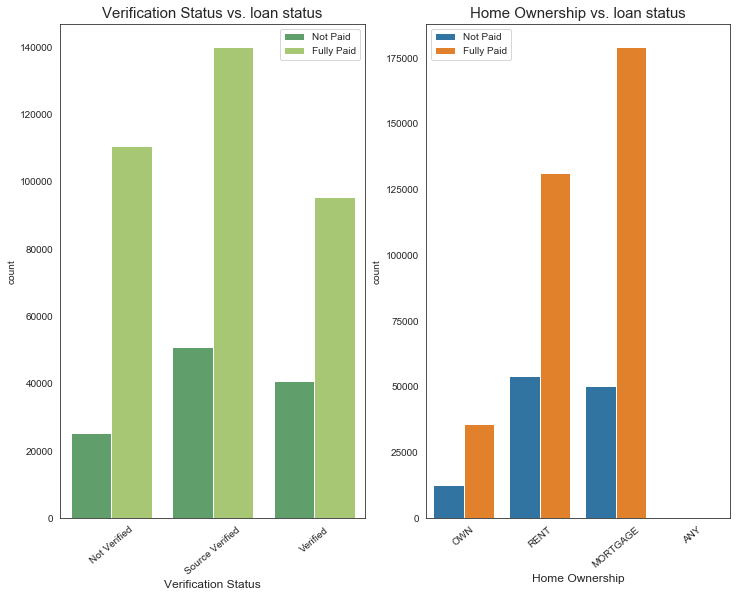

In [137]:
plt.figure(figsize=(12, 20))

plt.subplot(2, 2, 1)

sns.countplot(x = 'verification_status',
              data = df_impago, hue = df_impago.loan_status,
              palette = 'summer')
plt.legend(['Not Paid', 'Fully Paid'])
plt.title('Verification Status vs. loan status', size = 15)
plt.xticks(rotation = 40)
plt.xlabel('Verification Status', size = 12);

plt.subplot(2, 2, 2)

sns.countplot(x = df_impago.home_ownership, data = df_impago, hue = df_impago.loan_status)
plt.legend(['Not Paid', 'Fully Paid'])
plt.title('Home Ownership vs. loan status', size = 15)
plt.xticks(rotation = 40)
plt.xlabel('Home Ownership', size = 12);

It is important to see that there are not loans given matched to "any" home ownership option. This is, somehow, logical.

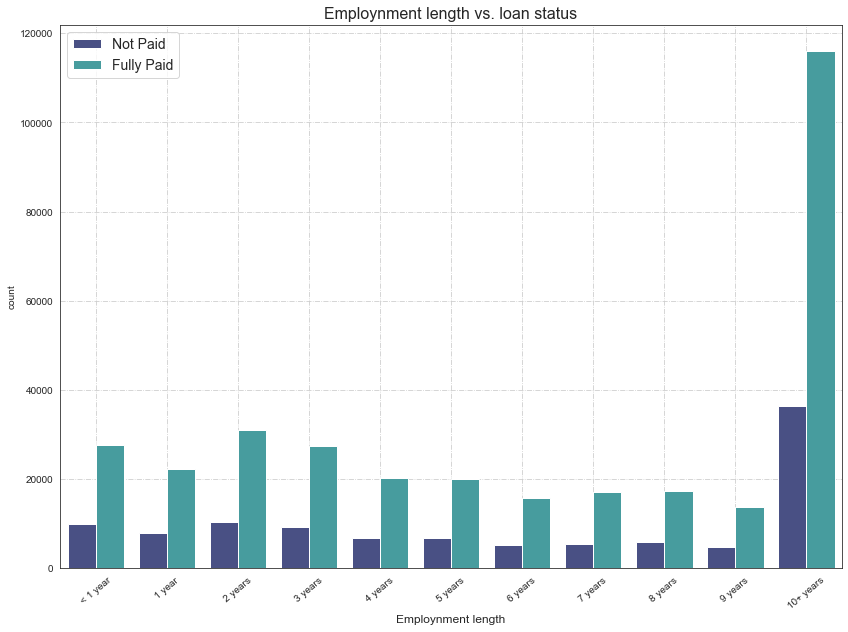

In [138]:
plt.figure(figsize = (14, 10))

order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]

sns.countplot(x = df_impago.emp_length, 
              data = df_impago, 
              hue = df_impago.loan_status, 
              order = order, 
              palette = 'mako')

plt.legend(['Not Paid', 'Fully Paid'], fontsize = 14)
plt.grid(ls = '-.')
plt.xlabel('Employnment length', size = 12)
plt.title('Employnment length vs. loan status', size = 16)
plt.xticks(rotation = 40);

We see that the most unpaid loans are those which were given to people who had been working for more than 10 years. But, on the other hand, this is not really worrying, because most of the loans are given to this employment length. If we calculate the ratio of the number of unpaid loans and the number of paid ones, we will check that it is 0.33, quite similar to the ratios of the other values of the lenght employnment type.

It is also logical to see that after 1, 2 or 3 years working, people start to ask for credits and loans, because they want to buy  car, start a home-mortgage, etc. That's the reason why they appear to be over the mean. 

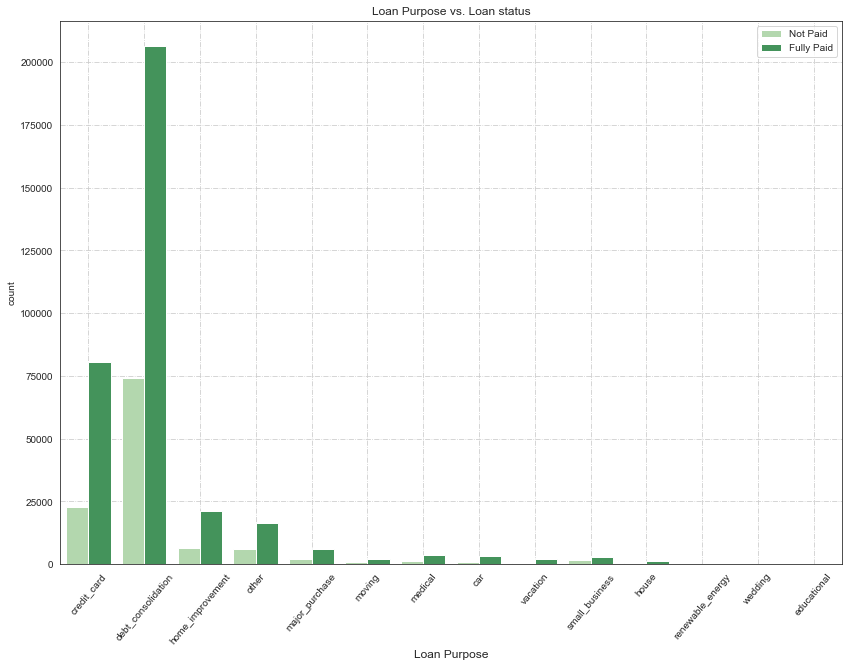

In [139]:
plt.figure(figsize=(14, 10))

sns.countplot(x = df_impago.purpose, data = df_impago, hue = df_impago.loan_status, palette = 'Greens')
plt.legend(['Not Paid', 'Fully Paid'], loc = 'upper right')
plt.grid(ls = '-.')
plt.title('Loan Purpose vs. Loan status')
plt.xlabel('Loan Purpose', size = 12)
plt.xticks(rotation = 50);

We saw a curiosity values at small_business purpose. Let's zoom to see it clearly:

In [140]:
small_busi = df_impago[df_impago.purpose == 'small_business']

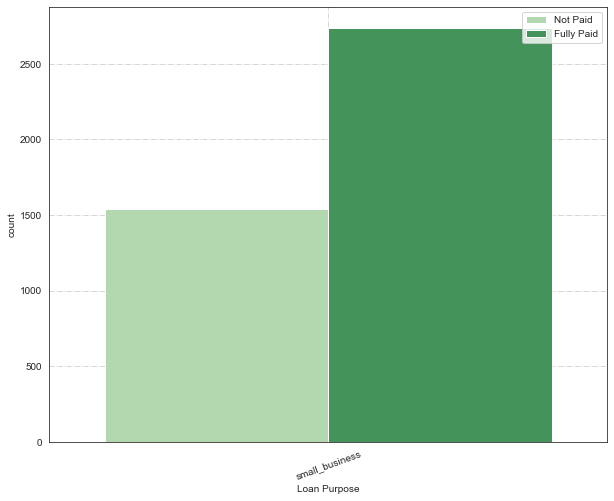

In [141]:
plt.figure(figsize=(10, 8))

sns.countplot(x = small_busi.purpose,
              data = small_busi, 
              hue = small_busi.loan_status,
              palette = 'Greens')
                            
plt.legend(['Not Paid', 'Fully Paid'], loc = 'upper right')
plt.grid(ls = '-.')
plt.xlabel('Loan Purpose')
plt.xticks(rotation = 20);

The "small_business" purpose for the loan is the value with the biggest ratio of number of unpaid/paid. This would have to be taken in count in order to achieve better predictive model results. We mean, if a borrower asks for a loan to use it for a small business we should be carefull analyzing both business and personal characteristics.

The FICO score is a credit score created to use the details of borrowers' credit reports to assess credit risk and determine whether to extend credit. This FICO scores take into account five areas to determine creditworthiness: payment history, current level of indebtedness, types of credit used, length of credit history, and new credit accounts.

We have the lower and higher FICO rate of each borrower. We want to represent it in order to see if the FICO rate affects to the loan payment. 

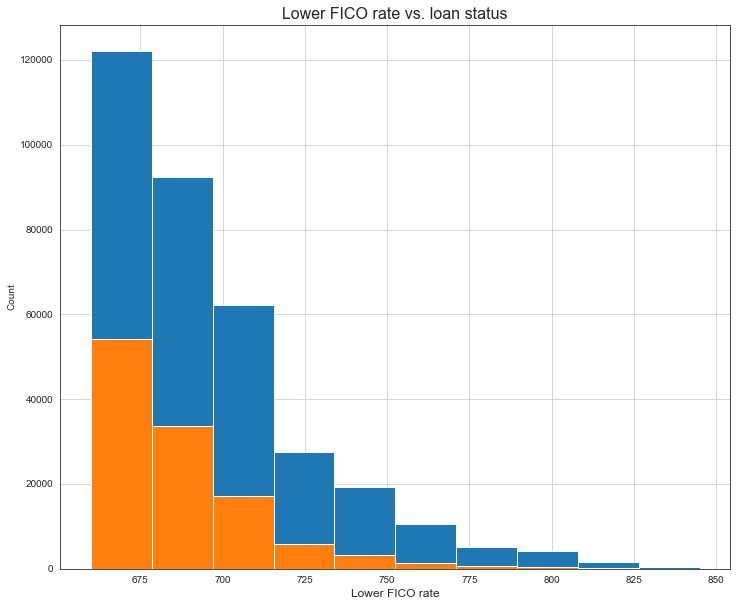

In [142]:
plt.figure(figsize=(12, 10))

df_impago[df_impago.loan_status == 1]['fico_range_low'].hist()
df_impago[df_impago.loan_status == 0]['fico_range_low'].hist()
plt.xlabel('Lower FICO rate', size = 12)
plt.ylabel('Count')
plt.title('Lower FICO rate vs. loan status', size = 16);

We see that the the lower the FICO rate is, the most unpayment risk we get. This is what we expected from the beggining.

The correlation between numeric variables are not high except in some variables, like FICO representing values, which are really related to each other (which is normal). Anyway, those variables are really important when considering to give or not to give a loan to a person, so we would not delete them.

### Division into numeric and categoric variables

We will treat separately both numeric and categoric/non numeric variables in order to scale those which are numeric, fix problems from both and then concatening them into a one DataFrame. 

#### Numeric ones

In [144]:
df_n = df_impago.drop(['addr_state',
                       'application_type',
                       'disbursement_method',
                       'emp_length',
                       'loan_status',
                       'emp_title',
                       'grade',
                       'hardship_flag',
                       'home_ownership',
                       'initial_list_status',
                       'purpose',
                       'pymnt_plan',
                       'title',
                       'verification_status',
                       'sub_grade',
                       'zip_code'], axis = 1)

In [145]:
df_n.shape

(462191, 25)

We see that we have 25 variables which are numeric. 

Furthermore, we are interested in discovering the class of each numeric variable (if it is objetc, float, integer, etc). We can implement it easily by:

In [146]:
for variable in list(df_n.columns):
    print(variable + ' --> ' + str(df_n[variable].nunique()) + ' , data type '  + str(df_n[variable].dtype))

int_rate --> 200 , data type object
annual_inc --> 29484 , data type float64
fico_range_low --> 38 , data type float64
fico_range_high --> 38 , data type float64
pub_rec --> 27 , data type float64
total_acc --> 127 , data type float64
last_fico_range_high --> 72 , data type float64
last_fico_range_low --> 71 , data type float64
acc_now_delinq --> 7 , data type float64
tot_coll_amt --> 8479 , data type float64
tot_cur_bal --> 242649 , data type float64
avg_cur_bal --> 58056 , data type float64
bc_open_to_buy --> 51462 , data type float64
bc_util --> 1328 , data type float64
delinq_amnt --> 953 , data type float64
mo_sin_old_il_acct --> 478 , data type float64
mo_sin_rcnt_rev_tl_op --> 228 , data type float64
mort_acc --> 35 , data type float64
num_bc_sats --> 46 , data type float64
num_tl_120dpd_2m --> 5 , data type float64
pct_tl_nvr_dlq --> 544 , data type float64
percent_bc_gt_75 --> 196 , data type float64
tot_hi_cred_lim --> 250593 , data type float64
total_bal_ex_mort --> 128944 ,

Every numeric variable is coded as float64 except interest rate, which is expressed in a percentage. In order to have them in the same form and type as the others, we will transform it by deleting the % symbol and codifying it as a float variable. 

In [147]:
df_n['int_rate'] = df_n.int_rate.str.strip('%').astype(float)

# Check it is correct: 

df_n.int_rate.head(5)

8      7.35
10    24.85
24     7.35
42    16.02
91    16.02
Name: int_rate, dtype: float64

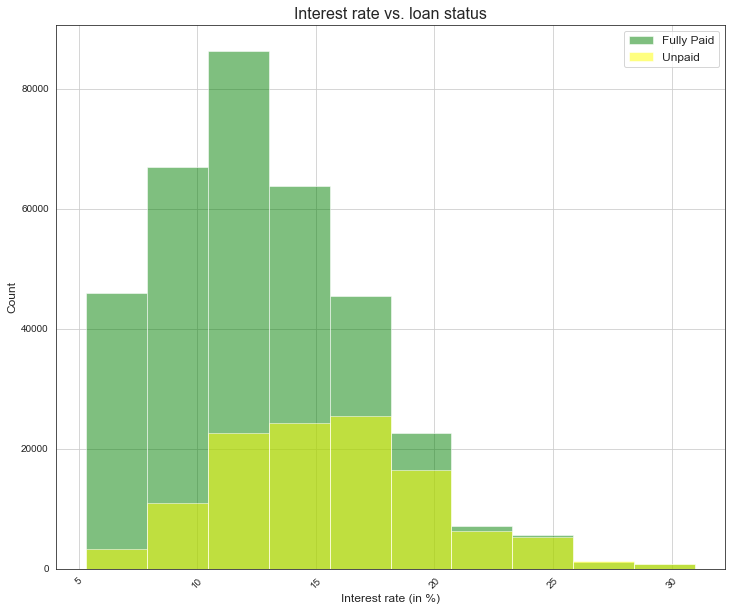

In [148]:
plt.figure(figsize=(12, 10))

df_n[df_impago.loan_status == 1]['int_rate'].hist(label = 'Fully Paid', alpha = 0.5, color = 'green')
df_n[df_impago.loan_status == 0]['int_rate'].hist(label = 'Unpaid', alpha = 0.5, color = 'yellow')
plt.legend(fontsize = 12)
plt.title('Interest rate vs. loan status', size = 16)
plt.xlabel('Interest rate (in %)', size = 12)
plt.ylabel('Count', size = 12)
plt.xticks(rotation = 45);

We check that the most unpaid loans occur when the interest rate is over $20 \%$. This might be a strategy from the credit/loan lender company: the more risk of unpayment you have, the higher interest rates you get. 

Once we have transformed all the numeric variables into float64 and int values, we want to check how the correlation matrix form is.

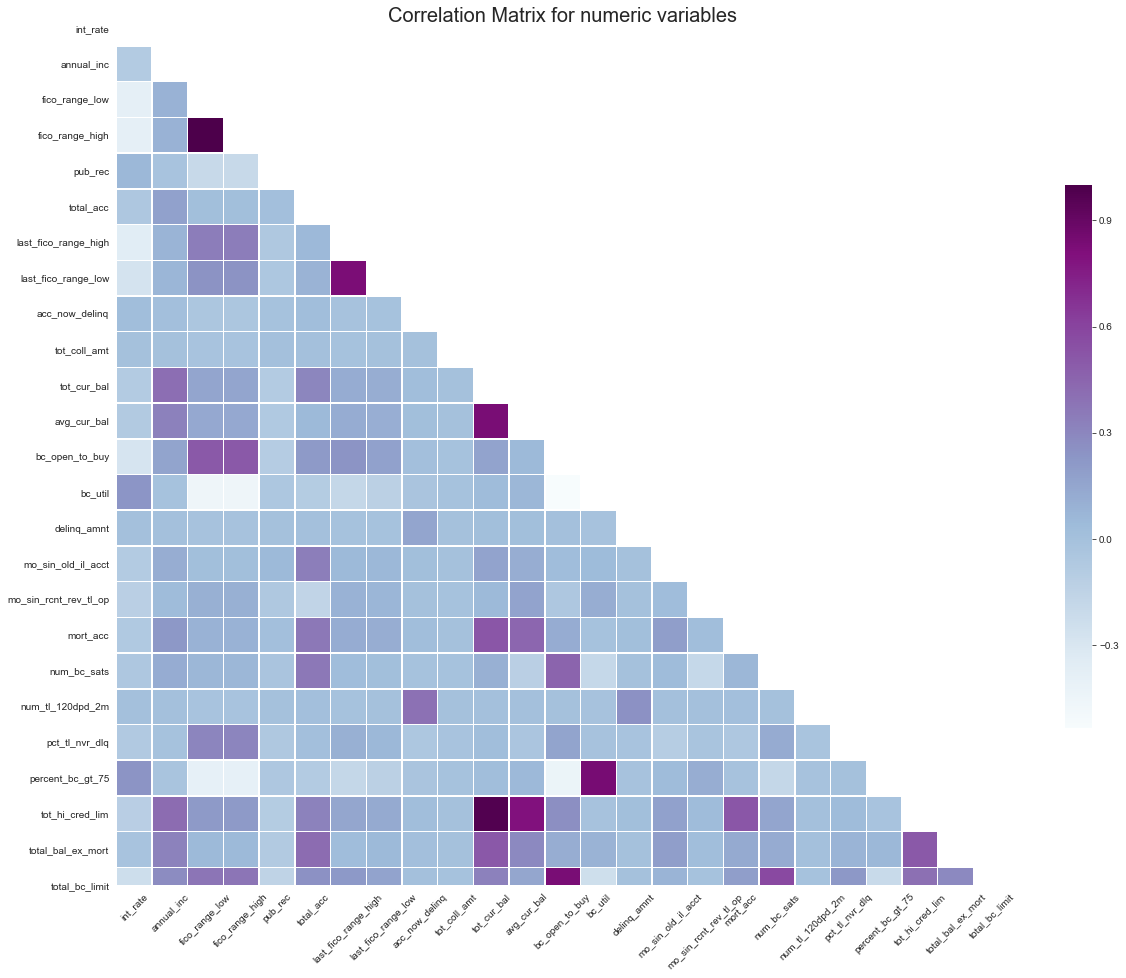

In [149]:
correlation_matrix = df_n.corr()

mask = np.zeros_like(correlation_matrix, dtype=np.bool) #para quitar la parte superior de la matriz 
mask[np.triu_indices_from(mask)] = True

sns.set_style(style = 'white') #para que no se vean los cuadrados que sobran 


f, ax = plt.subplots(figsize=(20, 20)) #dibujamos el lienzo 

# cmap = sns.diverging_palette(250, 700, as_cmap=True) #gama de colores que elegimos 

sns.heatmap(correlation_matrix, mask=mask, cmap = 'BuPu', 
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)   #es un grafico de mapa de calor

plt.xticks(rotation = 45)
plt.title('Correlation Matrix for numeric variables', size = 20);

The correlation between numeric variables are not high except in some variables, like FICO representing values, which are really related to each other (which is normal). Anyway, those variables are really important when considering to give or not to give a loan to a person, so we would not delete them.

Let's see what happens with the categorical columns.

#### Categorical variables:

Knowing the data we are taking in consideration permit us to discern whether a variable is categoric or not. In our study, we find out these variables as categorical: 

In [150]:
df_c = df_impago.loc[:,['addr_state',
                        'application_type',
                        'disbursement_method',
                        'emp_length',
                        'emp_title',
                        'grade',
                        'hardship_flag',
                        'home_ownership',
                        'initial_list_status',
                        'loan_status',
                        'purpose',
                        'pymnt_plan',
                        'title',
                        'verification_status',
                        'sub_grade',
                        'zip_code']]
# disbursement_method, earliest_cr_line, hardship_flag, initial_list_status, issue_d, last_credit_pull_d, 
# last_pymnt_d, policy_code, title, sub_grade, id, zip_code

Anyway, applying _business knowledge_ once again, we decided to drop some of those variables because we considered them as unusefull for our case. 

In [151]:
# Nos quedamos solo con las categoricas que vamos a incluir en los modelos
df_c.drop(['addr_state',
           'disbursement_method',
           'initial_list_status',
           'title',
           'sub_grade',
           'emp_title',
           'zip_code'], 
            axis = 'columns', 
            inplace = True)

In [152]:
df_c.head(5)

application_type emp_length grade hardship_flag home_ownership  \
8        Individual    6 years     A             N            OWN   
10       Individual    2 years     E             N           RENT   
24       Individual    7 years     A             N       MORTGAGE   
42       Individual    7 years     C             N           RENT   
91       Individual    7 years     C             N       MORTGAGE   

    loan_status             purpose pymnt_plan verification_status  
8             1         credit_card          n        Not Verified  
10            1  debt_consolidation          n     Source Verified  
24            1  debt_consolidation          n        Not Verified  
42            1  debt_consolidation          n     Source Verified  
91            1  debt_consolidation          n            Verified

We cannot work with variables like this in our models. In order to be able to use them to study our predictive models, we will transform them into binary variables. 

This is a bit laborius, but it has to be done to continue with the models.

In [153]:
df_c['application_type'] = df_c.application_type.map(lambda x: 0 if ( x == 'Individual')  else 1)

First of all we will transform the employnment length into 3 stages. This is: 

+ `0`: if the person who is asking for the loan has been working from 1 to 4 years.
+ `1`: if the person who asks for the loan has been working from 5 to 9 years.
+ `2`: if the person has been working more than 10 years.

The problem with this variable is that there are NaN values. We will consider them as if borrowers have not ever worked, so we will asign them as a 0.

In [154]:
def años(x):
    if (x == '1 year') | (x == '2 years') | (x == '3 years') | (x == '4 years'):
        return 0
    elif (x == '5 year') | (x == '6 years') | (x == '7 years') | (x == '8 years') | (x == '9 years'):
        return 1
    elif x == '10+ years':
        return 2
#MARIO Y GON SOLO EN DOS 

In [155]:
df_c['emp_length'] = df_c.emp_length.map(años)

df_c['emp_length'] = df_c.emp_length.fillna(0)

In [157]:
df_c.emp_length.unique()

array([1., 0., 2.])

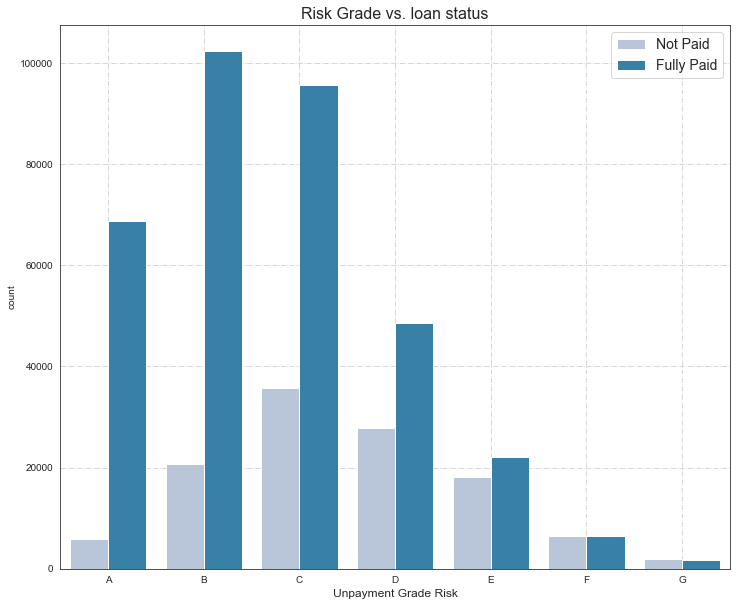

In [158]:
plt.figure(figsize = (12, 10))

order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

sns.countplot(x = 'grade',
              data = df_c,
              hue = df_impago.loan_status, 
              palette = 'PuBu',
              order = order)

plt.xlabel('Unpayment Grade Risk', size = 12)
plt.title('Risk Grade vs. loan status', size = 16)
plt.grid(ls = '-.')
plt.legend(['Not Paid', 'Fully Paid'], fontsize = 14);

We see that onwards `D` grade the risk of getting unpayment gets higher. For `F` and `G` grades is even more worrying because it becomes $ 50 \% - 50 \% $, and it has to be really taken in count in order to enhance our predictive models.

In this line, we will transform the grade of risk for the loan as binary. Then, we asign:

+ `0`: if the risk is low, or, similarly, the person is not expected to commit fraud. 
+ `1`: if the risk is high, or there are risk for the loan to be unpaid.

In [159]:
def riesgo(x):
    if (x == 'A') | (x == 'B') | (x == 'C'):
        return 0
    elif (x == 'D') | (x == 'E') | (x == 'F') | (x == 'G'):
        return 1

In [160]:
df_c['grade'] = df_c.grade.map(riesgo)

In [161]:
df_c.grade.unique()

array([0, 1], dtype=int64)

Third, we study the home ownership of the loan borrowers. We will codify them as binary, setting the differences on:

+ `0`: if the borrower has none own property (including a rent).
+ `1`: if the borrower has a mortgage or has his own home.

In [162]:
df_g.home_ownership.unique()

array(['OWN', 'MORTGAGE', 'RENT', 'ANY', 'NONE'], dtype=object)

In [163]:
def propiedad(x):
    if (x == 'OWN') | (x == 'MORTGAGE'):
        return 1
    else:
        return 0

In [164]:
df_c['home_ownership'] = df_c.home_ownership.map(propiedad)

In [165]:
df_c.home_ownership.unique()

array([1, 0], dtype=int64)

Other variable we consider as an important one is the purpose for which the borrower is asked to be given the loan. We will codify it as:

+ `0`: if the borrower wants the credit for businesses, debt payments, medical purposes or major purchases.
+ `1`: if it is for enhancing his/her life conditions.
+ `2`: other purposes like vacation, wedding, education, etc.

In [166]:
df_c.purpose.unique()

array(['credit_card', 'debt_consolidation', 'home_improvement', 'other',
       'major_purchase', 'moving', 'medical', 'car', 'vacation',
       'small_business', 'house', 'renewable_energy', 'wedding',
       'educational'], dtype=object)

In [167]:
def proposito(x):
    if (x == 'small_business') | (x == 'debt_consolidation') | (x == 'major_purchase' ) | (x == 'medical'):
        return 0
    elif (x == 'credit_card') | (x == 'home_improvement') | (x == 'house') | (x == 'car'):
        return 1
    else:
        return 2

In [168]:
df_c['purpose'] = df_c.purpose.map(proposito)

In [169]:
df_c.purpose.unique()

array([1, 0, 2], dtype=int64)

We transform the payment plan into binary by considering whether the borrower has contracted a payment plan or not.

In [170]:
df_c['pymnt_plan'] = df_c.pymnt_plan.map(lambda x: 0 if (x == 'n') else 1)

In [171]:
df_c.pymnt_plan.unique()

array([0, 1], dtype=int64)

The verification status variable will be transformed into binary by allocating:

+ `0`: if the incomes or rent of the borrower has not been verified.
+ `1`: if they have been verified.

In [172]:
df_c['verification_status'] = df_c.verification_status.map(lambda x: 0 if (x == 'Not Verified') else 1)

In [173]:
df_c.verification_status.unique()

array([0, 1], dtype=int64)

Now is time to consider whether the borrower is on a hardship plan with the credit company or the bank or not.

In [174]:
df_c['hardship_flag'] = df_c.hardship_flag.map(lambda x: 0 if (x == 'N') else 1)

In [175]:
df_c['hardship_flag'].unique()

array([0, 1], dtype=int64)

In [176]:
df_c.head(5)

application_type  emp_length  grade  hardship_flag  home_ownership  \
8                  0         1.0      0              0               1   
10                 0         0.0      1              0               0   
24                 0         1.0      0              0               1   
42                 0         1.0      0              0               0   
91                 0         1.0      0              0               1   

    loan_status  purpose  pymnt_plan  verification_status  
8             1        1           0                    0  
10            1        0           0                    1  
24            1        0           0                    0  
42            1        0           0                    1  
91            1        0           0                    1

We check the info of the categrical variables we have created:

In [177]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462191 entries, 8 to 421094
Data columns (total 9 columns):
application_type       462191 non-null int64
emp_length             462191 non-null float64
grade                  462191 non-null int64
hardship_flag          462191 non-null int64
home_ownership         462191 non-null int64
loan_status            462191 non-null int64
purpose                462191 non-null int64
pymnt_plan             462191 non-null int64
verification_status    462191 non-null int64
dtypes: float64(1), int64(8)
memory usage: 45.3 MB


### Concatenation of numeric and categorical DataFrames

In [178]:
df_unido = pd.DataFrame(pd.concat([df_n, df_c], axis = 1))

In [179]:
df_unido.head(12)

int_rate  annual_inc  fico_range_low  fico_range_high  pub_rec  \
8        7.35    153000.0           720.0            724.0      1.0   
10      24.85     50000.0           685.0            689.0      0.0   
24       7.35    110000.0           710.0            714.0      0.0   
42      16.02     51979.0           690.0            694.0      2.0   
91      16.02     75000.0           685.0            689.0      0.0   
92      30.79    160000.0           675.0            679.0      1.0   
104     20.00     33000.0           665.0            669.0      0.0   
176     11.99     63000.0           665.0            669.0      0.0   
181     18.06     85000.0           665.0            669.0      0.0   
207     10.91     38000.0           675.0            679.0      0.0   
217     10.42     35000.0           665.0            669.0      0.0   
222      9.44    250000.0           710.0            714.0      0.0   

     total_acc  last_fico_range_high  last_fico_range_low  acc_now_delinq  \
8         46.0                 724.0                720.0             0.0   
10         5.0                 669.0                665.0             0.0   
24        27.0                 719.0                715.0             0.0   
42        21.0                 659.0                655.0             0.0   
91        10.0                 684.0                680.0             0.0   
92        36.0                 699.0                695.0             0.0   
104       19.0                 599.0                595.0             0.0   
176       17.0                 714.0                710.0             0.0   
181       10.0                 634.0                630.0             0.0   
207       16.0                 734.0                730.0             0.0   
217        7.0                 689.0                685.0             0.0   
222       34.0                 719.0                715.0             0.0   

     tot_coll_amt         ...           total_bc_limit  application_type  \
8             0.0         ...                  28100.0                 0   
10            0.0         ...                   3600.0                 0   
24            0.0         ...                  83700.0                 0   
42          251.0         ...                  18800.0                 0   
91            0.0         ...                   3000.0                 0   
92            0.0         ...                  26400.0                 0   
104           0.0         ...                   7200.0                 0   
176         254.0         ...                   8800.0                 0   
181           0.0         ...                  11350.0                 0   
207           0.0         ...                   9800.0                 0   
217         408.0         ...                   2200.0                 0   
222           0.0         ...                  77000.0                 0   

     emp_length  grade  hardship_flag  home_ownership  loan_status  purpose  \
8           1.0      0              0               1            1        1   
10          0.0      1              0               0            1        0   
24          1.0      0              0               1            1        0   
42          1.0      0              0               0            1        0   
91          1.0      0              0               1            1        0   
92          2.0      1              0               1            1        1   
104         1.0      1              0               0            0        1   
176         0.0      0              0               1            1        1   
181         0.0      1              0               0            0        0   
207         1.0      0              0               1            1        0   
217         2.0      0              0               0            0        2   
222         2.0      0              0               1            1        0   

     pymnt_plan  verification_status  
8             0        

Once we have the concatenation for both numeric and categorical variables, we export it to a csv document in order to have our cleaned data ready to load in other steps. 

In [181]:
df_unido.to_csv('../data/df_unido.csv')

### Scaling variables and PipeLines

We execute now a pipeline function in order to scale our variables, transform our NaN values and trear apart the categorical variables in a more efficient way.

In [182]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [184]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='999'))])    
categorical_features = df_unido.select_dtypes(include=['object']).columns

In [185]:
numeric_features = df_unido.select_dtypes(include=['int64', 'float64','int32']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [186]:
df_unido_sin_na = pd.DataFrame(preprocessor.fit_transform(df_unido), columns = df_unido.columns)

In [188]:
df_unido_sin_na.to_csv('../data/datos_tratados.csv')

We export the DataFrame once scaled and all-NaN-values dropped to be able to work with it comfortably and efficiently in next coding steps.

### References

+ https://scikit-learn.org/stable/modules/preprocessing.html
+ https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
+ https://towardsdatascience.com/stop-one-hot-encoding-your-categorical-variables-bbb0fba89809
+ https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf